<a href="https://colab.research.google.com/github/Mina0402/EU_M_Math-Repository/blob/main/Chap04_Cm_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

np.random.seed(0)

In [ ]:
dice_data=np.array([1,2,3,4,5,6])

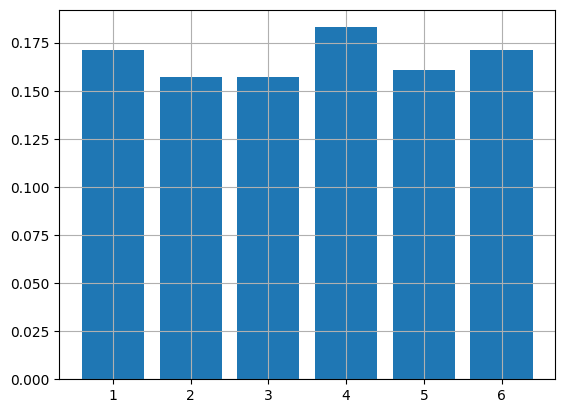

In [ ]:
calc_steps=1000
dice_rolls=np.random.choice(dice_data, calc_steps)

prob_data=np.array([])
for i in range(1,7):
  p=len(dice_rolls[dice_rolls==i])/calc_steps
  prob_data=np.append(prob_data, len(dice_rolls[dice_rolls==i])/calc_steps)

plt.bar(dice_data, prob_data)
plt.grid(True)



In [ ]:
#ベルヌーイ分布
prob_be_data=np.array([])
coin_data=np.array([0,0,0,0,0,1,1,1])

for i in np.unique(coin_data):
  p=len(coin_data[coin_data==i])/len(coin_data)
  print(i,'が出る確率', p)
  prob_be_data=np.append(prob_be_data, p)


0 が出る確率 0.625
1 が出る確率 0.375


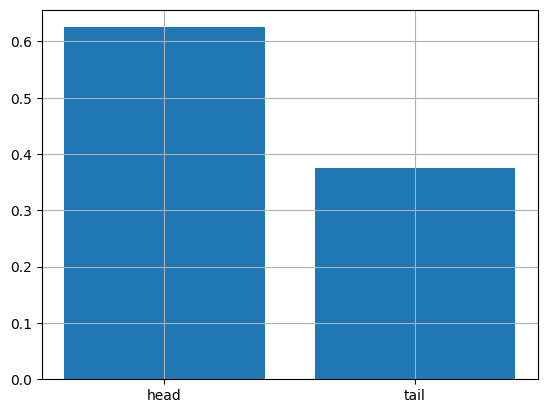

In [ ]:
plt.bar([0,1], prob_be_data, align='center')
plt.xticks([0,1],['head', 'tail'])
plt.grid(True)

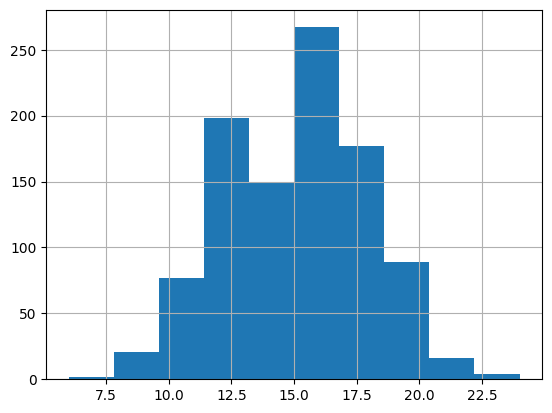

In [ ]:
#二項分布
np.random.seed(0)
x=np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

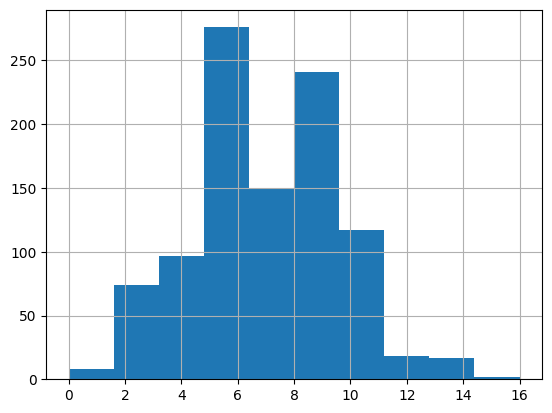

In [ ]:
#ポアソン分布
x=np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

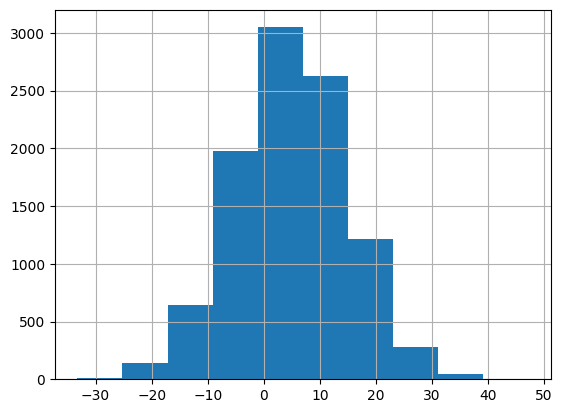

In [ ]:
#正規分布
#np.random.normal(平均,標準偏差,サンプル数)
x=np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

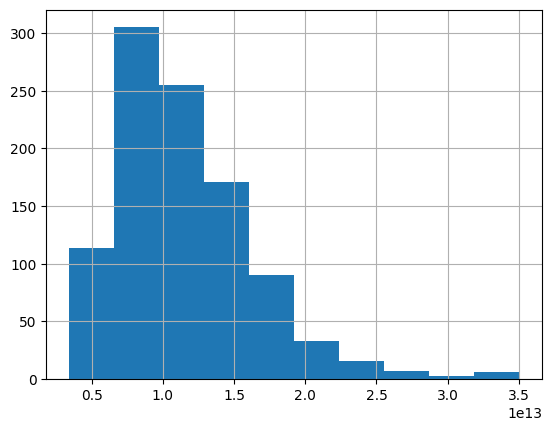

In [ ]:
#対数正規分布
x=np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline
%precision 3

from sklearn import linear_model

import requests, zipfile
import io
from io import StringIO


url='https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r=requests.get(url, stream=True)

z=zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()


In [4]:
ls

sample_data/  student-mat.csv  student-merge.R  student-por.csv  student.txt


In [7]:
student_data_math=pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


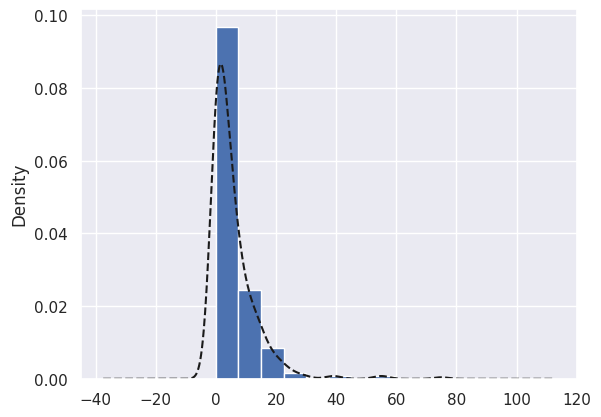

In [8]:
#カーネル密度関数
student_data_math.absences.plot(kind='kde', style='k--')

student_data_math.absences.hist(density=True)
plt.grid(True)

In [9]:
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

x,y=np.mgrid[10:100:2, 10:100:2]

pos=np.empty(x.shape + (2, ))

pos[:,:,0]=x
pos[:,:,1]=y

In [10]:
#多次元正規分布
#それぞれの変数の平均と分散共分散行列を設定
#以下の例では、xとyの平均がそれぞれ50と50、[[100, 0], [0, 100]]がxとyの共分散行列となる
ry=multivariate_normal([50, 50], [[100, 0], [0, 100]])

#確率密度関数
z=ry.pdf(pos)

In [11]:
fig=plt.figure(dpi=100)

ax=Axes3D(fig)
ax.plot_wireframe(x ,y ,z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

#z軸の表示目盛り単位を変更、sciが指数表示、axisで軸を指定、scilimits(n,m)はnからmの外にあるものは指数表記
#scilimits(0,0)は全て指数表記にするという意味

ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))


<Figure size 640x480 with 0 Axes>

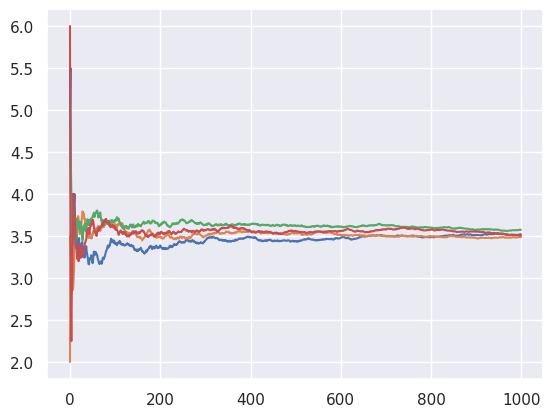

In [12]:
#大数の法則
#計算回数
calc_times=1000
#サイコロ
sample_array=np.array([1,2,3,4,5,6])
number_cnt=np.arange(1, calc_times + 1)

#4つのパスを作成
for i in range(4):
  p=np.random.choice(sample_array, calc_times).cumsum()
  plt.plot(p/number_cnt)
  plt.grid(True)


In [13]:
#中心極限定理
def function_central_theory(N):

  sample_array=np.array([1,2,3,4,5,6])
  number_cnt=np.arange(1, N+1)*1.0

  mean_array = np.array([])

  for i in range(1000):
      cum_variables=np.random.choice(sample_array, N).cumsum()*1.0
      mean_array=np.append(mean_array, cum_variables[N-1]/N)
  plt.hist(mean_array)
  plt.grid(True)

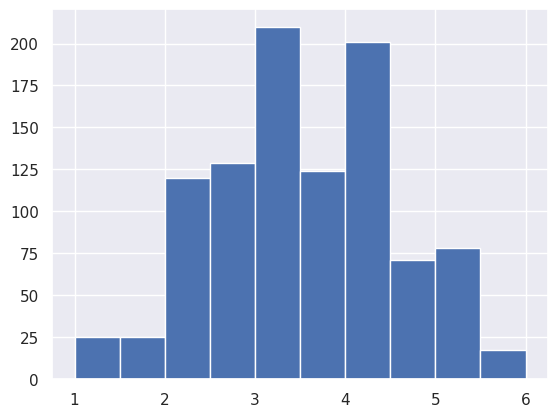

In [14]:
#N=3
function_central_theory(3)

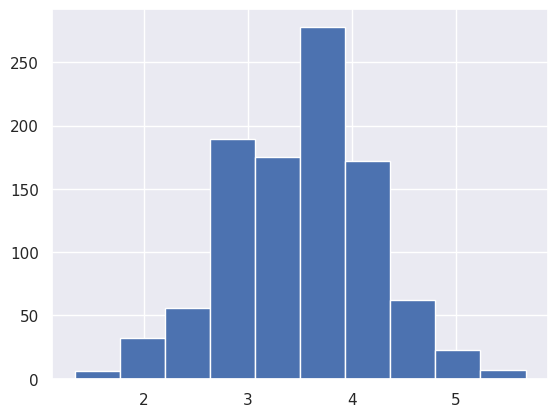

In [15]:
#N=6
function_central_theory(6)

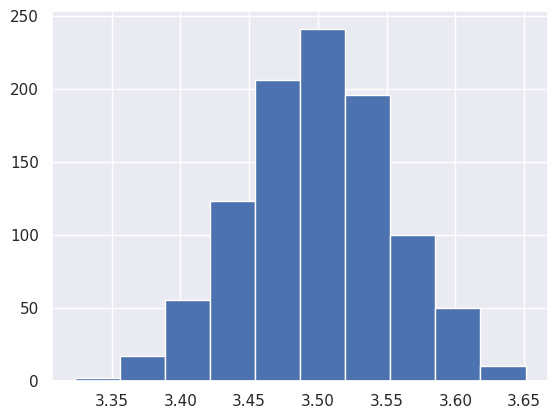

In [16]:
#N=10^3
function_central_theory(10**3)

In [28]:
#ポルトガルのデータを読み込む
student_data_por=pd.read_csv('student-por.csv', sep=';')
student_data_math.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [29]:
student_data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [55]:
#マージ
student_data_merge=pd.merge(student_data_math
                            , student_data_por
                            , on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu'
                                       , 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
                            , suffixes=('_math', '_por'))

print('それぞれの欠席数(absences)については、差があるといえるのか')

print('数学の欠席数平均:', student_data_merge.absences_math.mean())
print('ポルトガル語の欠席数平均:', student_data_merge.absences_por.mean())

from scipy import stats
t,p=stats.ttest_rel(student_data_merge.absences_math, student_data_merge.absences_por)
print('p値=', p)
if p<=0.05:
 print('p値が0.05以下であるため、G1の数学とポルトガル語のそれぞれの欠席数は、有意である')
else:
  print('p値が0.05より大きいため、G1の数学とポルトガル語のそれぞれの欠席数は、有意でない')

それぞれの欠席数(absences)については、差があるといえるのか
数学の欠席数平均: 5.319371727748691
ポルトガル語の欠席数平均: 3.6727748691099475
p値= 2.3441656888384195e-06
p値が0.05以下であるため、G1の数学とポルトガル語のそれぞれの欠席数は、有意である


In [56]:
print('それぞれの勉強時間(studytime)については、差があるといえるのか')
print('数学の勉強時間平均:', student_data_merge.studytime_math.mean())
print('ポルトガル語の勉強時間平均:', student_data_merge.studytime_por.mean())

from scipy import stats
t,p=stats.ttest_rel(student_data_merge.studytime_math, student_data_merge.studytime_por)
print('p値=', p)
if p<=0.05:
 print('p値が0.05以下であるため、G1の数学とポルトガル語のそれぞれの勉強時間は、有意である')
else:
  print('p値が0.05より大きいため、G1の数学とポルトガル語のそれぞれの勉強時間は、有意でない')

それぞれの勉強時間(studytime)については、差があるといえるのか
数学の勉強時間平均: 2.0340314136125652
ポルトガル語の勉強時間平均: 2.0392670157068062
p値= 0.5643842756976525
p値が0.05より大きいため、G1の数学とポルトガル語のそれぞれの勉強時間は、有意でない
